## IMPORTS

In [337]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


## PART 1 DATA PREPARATION

In [338]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATASET_PATH = "dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [339]:
train_data = datagen.flow_from_directory(
   r'D:\Downloads\PEN_PENCIL_DATASET',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)


Found 286 images belonging to 2 classes.


In [340]:
val_data = datagen.flow_from_directory(
    r'D:\Downloads\PEN_PENCIL_DATASET',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 71 images belonging to 2 classes.


## PART 2 CNN MODEL DESIGN



In [341]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


In [342]:
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │          57,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,993 (300.75 KB)

 Trainable params: 76,993 (300.75 KB)

 Non-trainable params: 0 (0.00 B)

## PART 3 MODEL TRAINING


In [343]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [344]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12
)


Epoch 1/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 772ms/step - accuracy: 0.5455 - loss: 0.6748 - val_accuracy: 0.6901 - val_loss: 0.6306
Epoch 2/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7203 - loss: 0.5886 - val_accuracy: 0.7465 - val_loss: 0.5372
Epoch 3/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7587 - loss: 0.5333 - val_accuracy: 0.8451 - val_loss: 0.4883
Epoch 4/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7098 - loss: 0.4970 - val_accuracy: 0.8028 - val_loss: 0.4607
Epoch 5/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8217 - loss: 0.4386 - val_accuracy: 0.7746 - val_loss: 0.4850
Epoch 6/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8671 - loss: 0.3611 - val_accuracy: 0.8169 - val_loss: 0.3800
Epoch 7/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9021 - loss: 0.2965 - val_accuracy: 0.8028 - val_loss: 0.3909
Epoch 8/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8846 - loss: 0.2497 - val_accuracy: 0.8169 - val_loss:

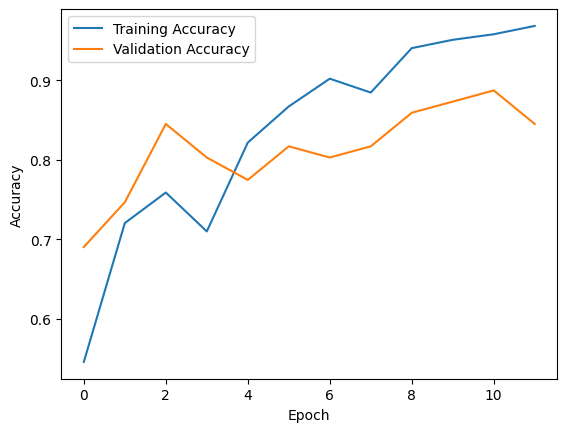

In [345]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [346]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8451 - loss: 0.3744
Validation Accuracy: 0.85
Validation Loss: 0.37


## PART 4 MODEL EVALUATION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


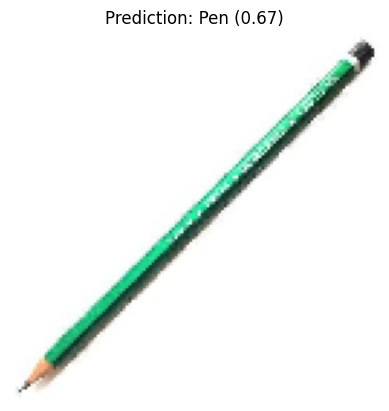

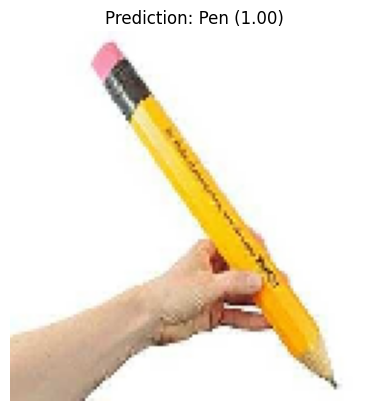

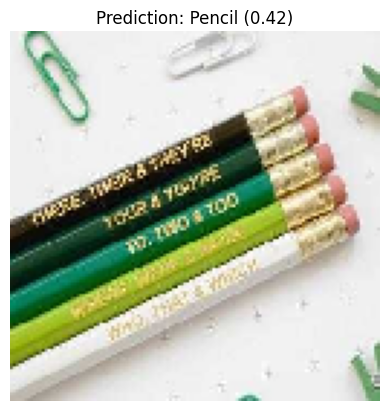

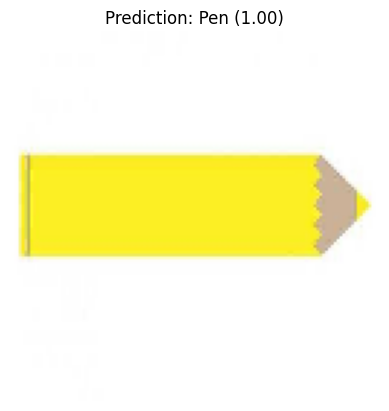

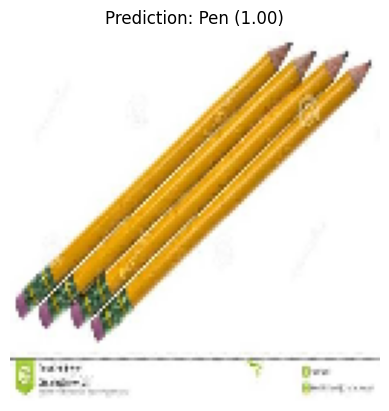

In [347]:
sample_images, sample_labels = next(val_data)
predictions = model.predict(sample_images)

for i in range(5):
    confidence = predictions[i][0]
    predicted_class = "Pen" if confidence > 0.5 else "Pencil"

    plt.imshow(sample_images[i])
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Pen
Confidence Score: 0.22


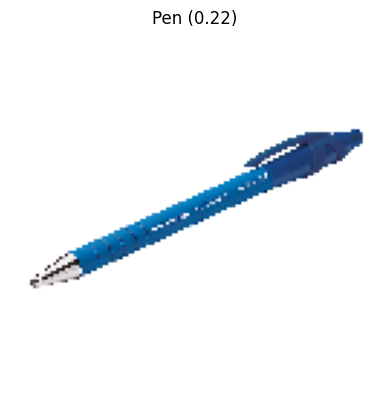

In [358]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


img_path = r"C:\Users\shedr\AI ah\PEN PENCIL\TEST\PEN\PENTEST2.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
confidence = prediction[0][0]

if confidence > 0.5:
    label = "Pencil"
else:
    label = "Pen"

print(f"Prediction: {label}")
print(f"Confidence Score: {confidence:.2f}")

plt.imshow(img)
plt.title(f"{label} ({confidence:.2f})")
plt.axis('off')
plt.show()



In [349]:
print(train_data.class_indices)


{'pen': 0, 'pencil': 1}


## SHORT REFLECTION
The CNN model successfully classified pen and pencil images using supervised learning. Dataset imbalance initially affected performance, but balancing the classes and applying data augmentation improved prediction reliability. While accuracy was acceptable, higher validation loss indicated overconfidence on some ambiguous images, reflecting the inherent difficulty of distinguishing visually similar objects. The model fulfills the learning objectives and highlights both the strengths and limitations of basic CNN architectures.
